In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [3]:
titanic = pd.read_csv("titanic.csv")

In [4]:
print(titanic.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
print("The median of age column is: ",titanic["Age"].median(skipna=True))
print("Percent of missing records in cabin",titanic["Cabin"].isnull().sum()/titanic.shape[0]*100)
print("Most common boarding point", titanic["Embarked"].value_counts().idxmax())

The median of age column is:  28.0
Percent of missing records in cabin 77.10437710437711
Most common boarding point S


In [6]:
titanic["Age"].fillna(titanic["Age"].median(skipna=True),inplace=True)
titanic["Embarked"].fillna(titanic["Embarked"].value_counts().idxmax(),inplace=True)
titanic.drop("Cabin",axis=1,inplace=True)

C:\Users\Zacha\AppData\Local\Temp\ipykernel_28540\2323133755.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic["Age"].fillna(titanic["Age"].median(skipna=True),inplace=True)
C:\Users\Zacha\AppData\Local\Temp\ipykernel_28540\2323133755.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

In [7]:
print(titanic.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [8]:
lrmodel = LogisticRegression()
titanic.drop("PassengerId",axis=1,inplace=True)
titanic.drop("Name",axis=1,inplace=True)
titanic.drop("Ticket",axis=1,inplace=True)
titanic.drop("SibSp",axis=1,inplace=True)
titanic.drop("Parch",axis=1,inplace=True)

In [9]:
label_encoder = preprocessing.LabelEncoder()
titanic["Sex"] = label_encoder.fit_transform(titanic["Sex"])
titanic["Embarked"] = label_encoder.fit_transform(titanic["Embarked"])

In [10]:
X = titanic[["Pclass","Sex","Age","Fare","Embarked"]]
Y = titanic["Survived"]

In [11]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=2)

In [12]:
lrmodel.fit(xtrain,ytrain)

LogisticRegression()

In [13]:
ypred = lrmodel.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81       100
           1       0.80      0.66      0.72        79

    accuracy                           0.78       179
   macro avg       0.78      0.76      0.77       179
weighted avg       0.78      0.78      0.77       179



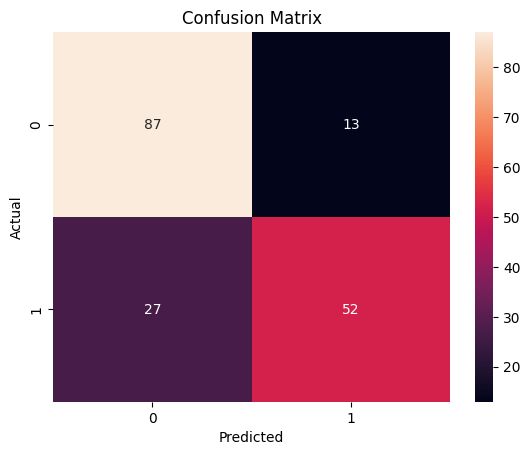

In [14]:
matrix = confusion_matrix(ytest,ypred)
sns.heatmap(matrix,annot=True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()